### 2-D Norm Visualization

Now for the $\ell_{2}$ norm in the 2-D scenario. <br></br>

The $\ell_{2}$ norm is represented by the notation - 

$$||x||_{2}$$

We will use the same line equation from the $\ell_{1}$ example.

$$x_{2} = 2x_{1} + 3$$

In [198]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%matplotlib notebook

from matplotlib import cm
from matplotlib.ticker import LinearLocator

In [199]:
x1 = np.arange(-10,11,.01)
line_fun = lambda x: (2 * x) + 3
x2 = line_fun(x1)

<IPython.core.display.Javascript object>


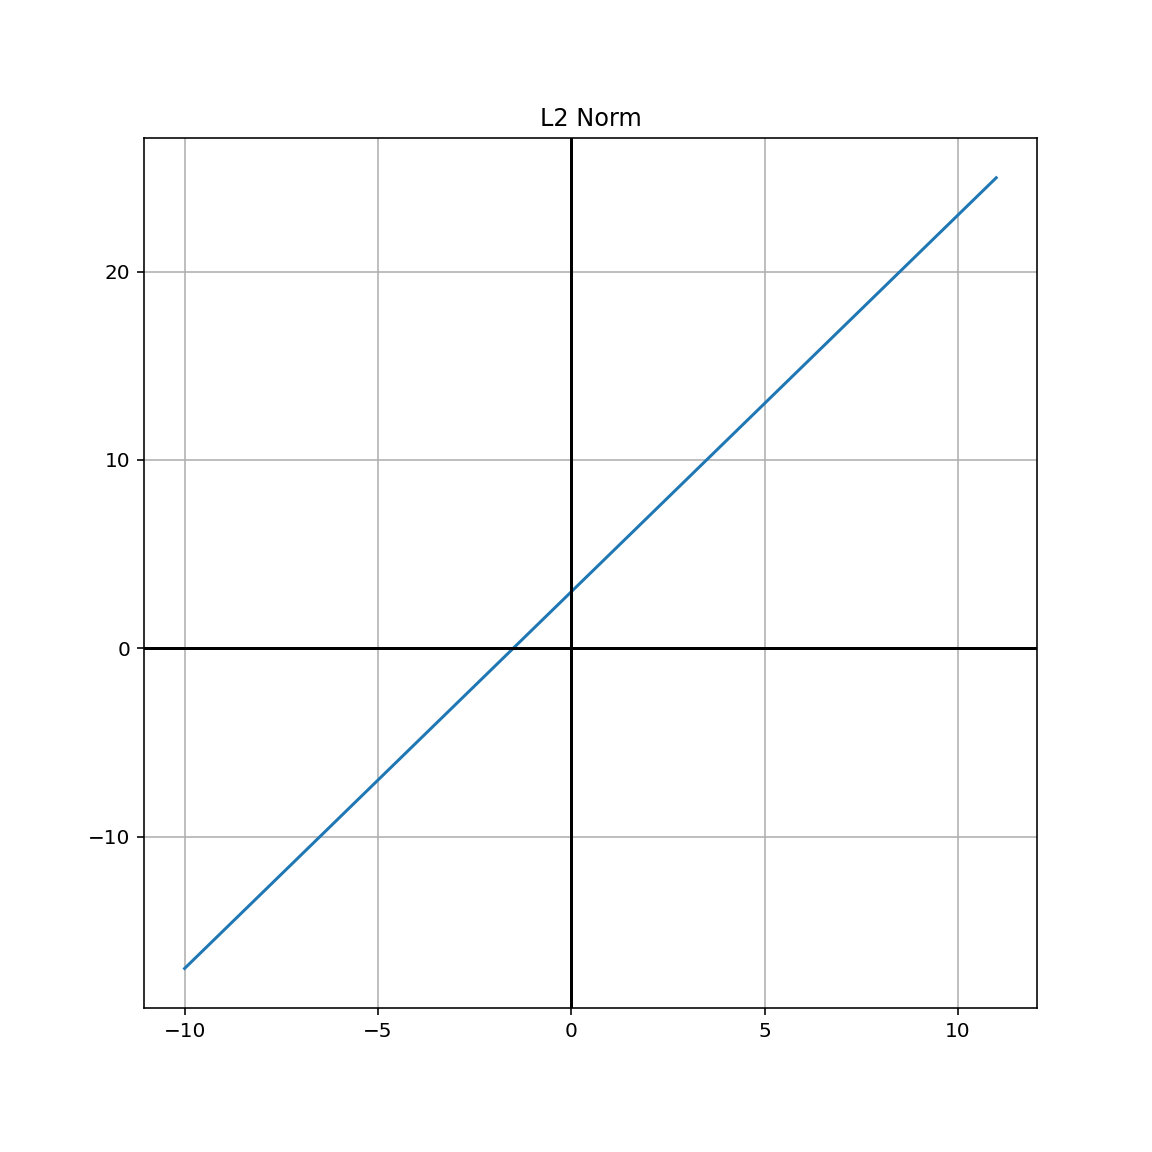

In [200]:
plt.figure(figsize=(8,8))
plt.title('L2 Norm')
plt.plot(x1,x2)
plt.grid()
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.show();

$$ \ell_{2} norm: ||x||_{2} = \sqrt{\sum_{i=1}^{n}|x_{i}|^2}$$

In [201]:
l2_norm = np.sqrt(np.sum(np.stack((np.square(np.abs(x1)), np.square(np.abs(x2)))),axis=0))

In [202]:
idxmin = np.argmin(l2_norm)

In [203]:
l2_coords = x1[idxmin], x2[idxmin]

In [204]:
norm = ((abs(x1[idxmin])**2) + (abs(x2[idxmin])**2))**.5

In [205]:
norm

1.3416407864998738

In [206]:
x1[idxmin], x2[idxmin]

(-1.2000000000001876, 0.5999999999996248)

Next we can plot the norm as a point on the graph below: 

<IPython.core.display.Javascript object>


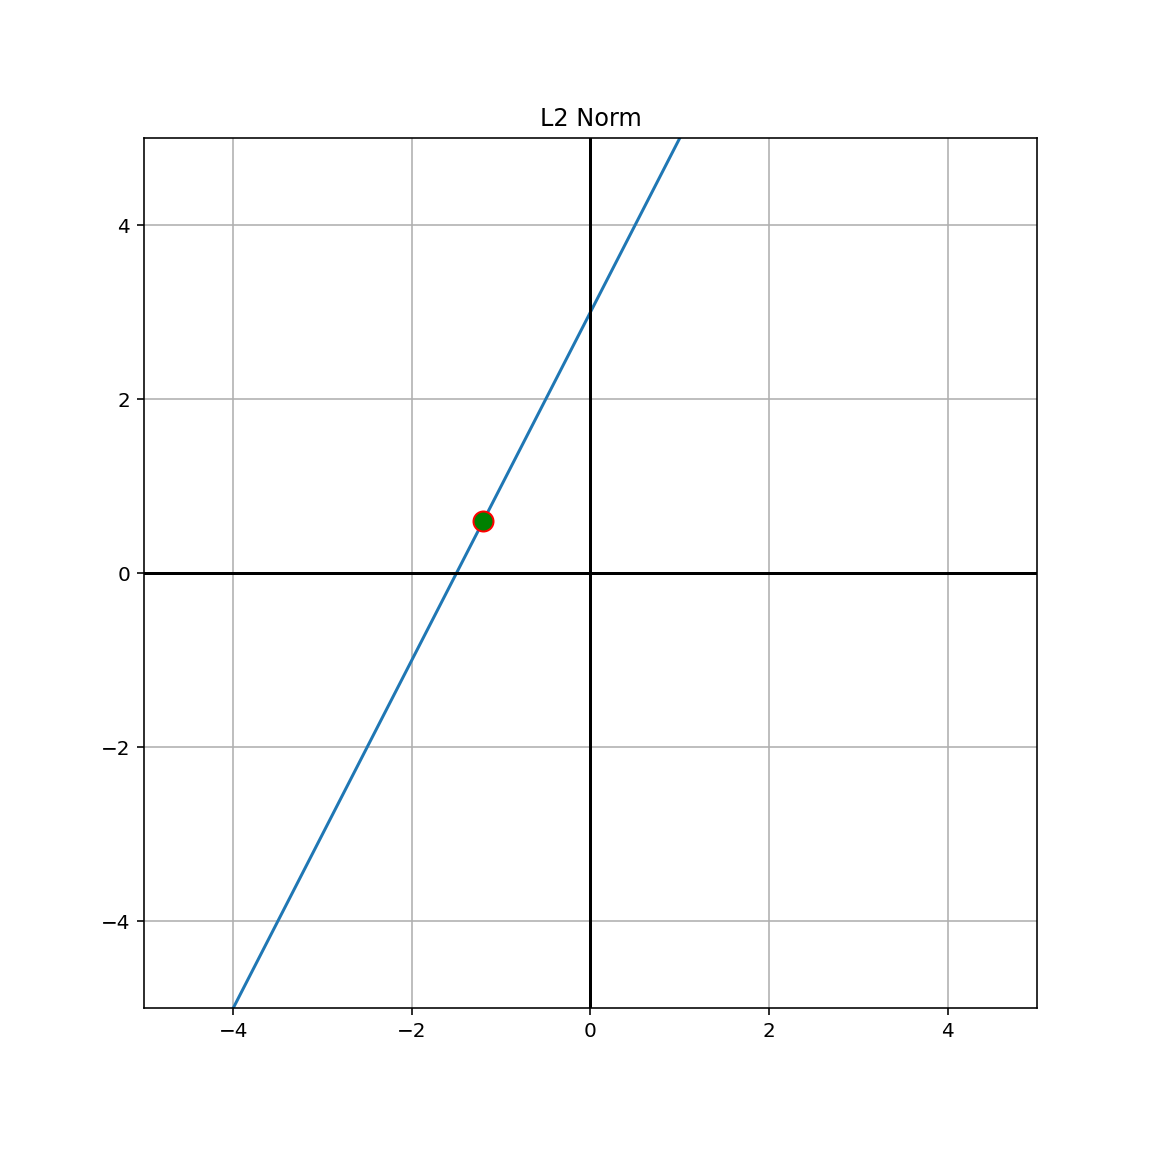

In [207]:
plt.figure(figsize=(8,8))
plt.title('L2 Norm')
plt.plot(x1,x2)
plt.plot(l2_coords[0], l2_coords[1], marker="o", markersize=10, markeredgecolor="red", markerfacecolor="green")
plt.grid()
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.xlim([-5,5])
plt.ylim([-5,5])
plt.show();

Now if we look at all of the points where $\sqrt{|x_{1}|^2 + |x_{2}|^2} \approx 1.34$, we can get an approximate intuition of the shape of the $\ell_{2}$ norm.

Of course we need to capture both the negative on positive sides of this because of the absolute value, and we can see the result in the plot below.

The above equation can be rearranged to, $$|x_{1}|^2 + |x_{2}|^2 \approx 1.34^2$$

$$|x_{2}|^2 \approx 1.34^2 - |x_{1}|^2$$

In [208]:
x1_norm = np.arange(-norm, norm, 0.0001)
x2_norm_pos = np.sqrt((abs(norm)**2) - np.square(np.abs(x1_norm)))
x2_norm_neg = -x2_norm_pos

<IPython.core.display.Javascript object>


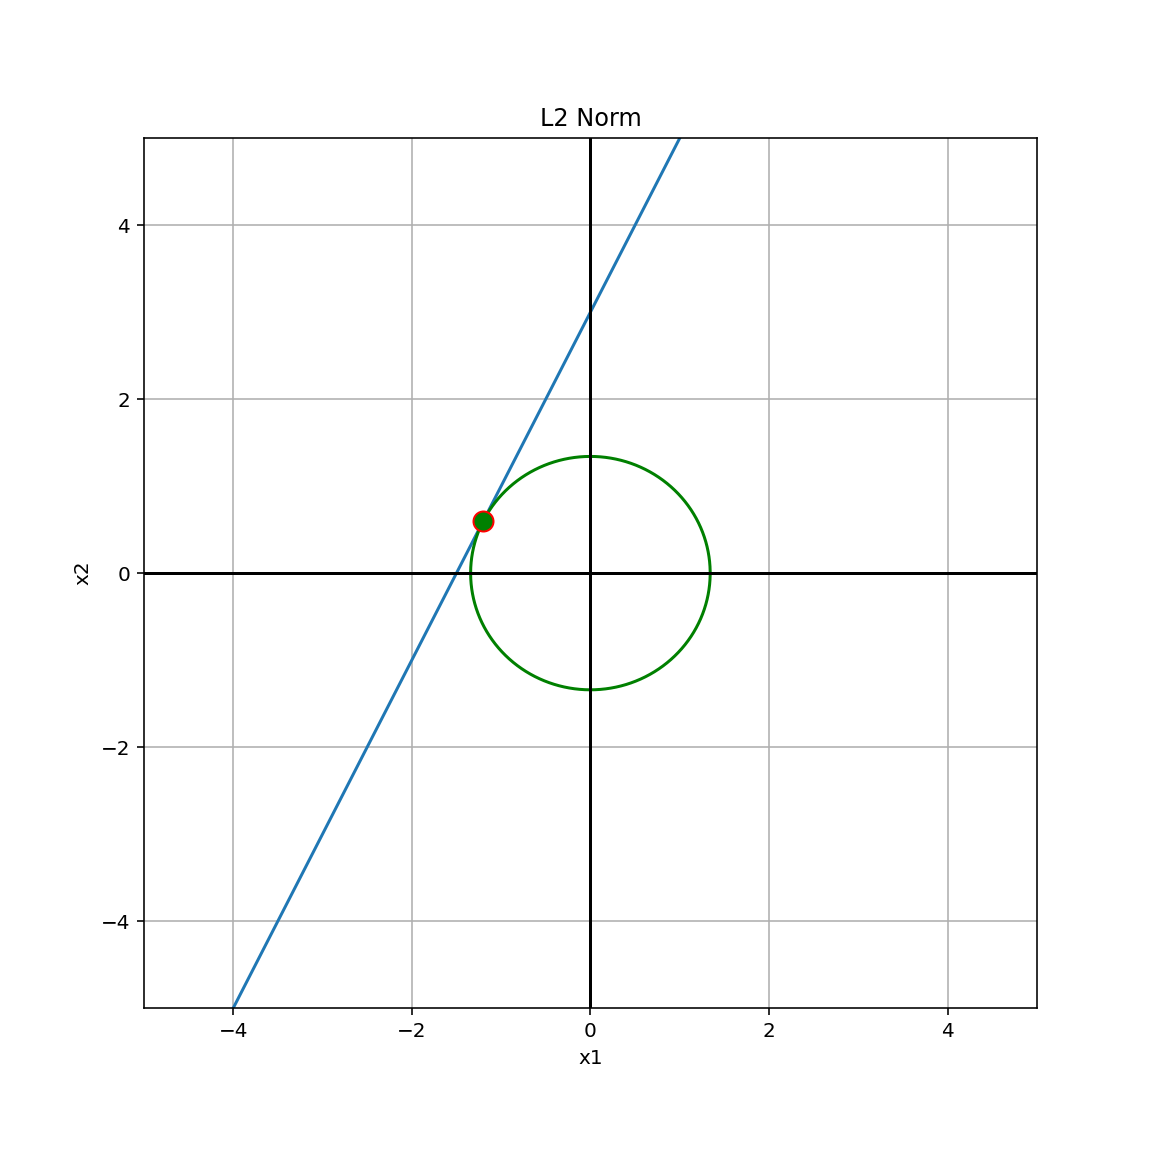

In [209]:
plt.figure(figsize=(8,8))
plt.title('L2 Norm')
plt.xlabel("x1")
plt.ylabel("x2")
plt.plot(x1,x2)
plt.plot(x1_norm, x2_norm_pos, color='green')
plt.plot(x1_norm, x2_norm_neg, color='green')
plt.plot(l2_coords[0], l2_coords[1], marker="o", markersize=10, markeredgecolor="red", markerfacecolor="green")
plt.grid()
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.xlim([-5,5])
plt.ylim([-5,5])
plt.show();

We can see that the $\ell_{2}$ norm is given by this circlular shape.

---

### 3-D Norm Visualization

We can create the same type of visual in the 3-D space.

This time instead of using a line we will use a plane with the following equation:

$$ x_{3} = 2x_{1} + 3x_{2} + 4 $$

In [109]:
x1 = np.arange(-10, 10, .01)
x2 = np.arange(-10, 10, .01)
plane_func = lambda x1, x2: (2*x1) + (3*x2) + 4

<IPython.core.display.Javascript object>


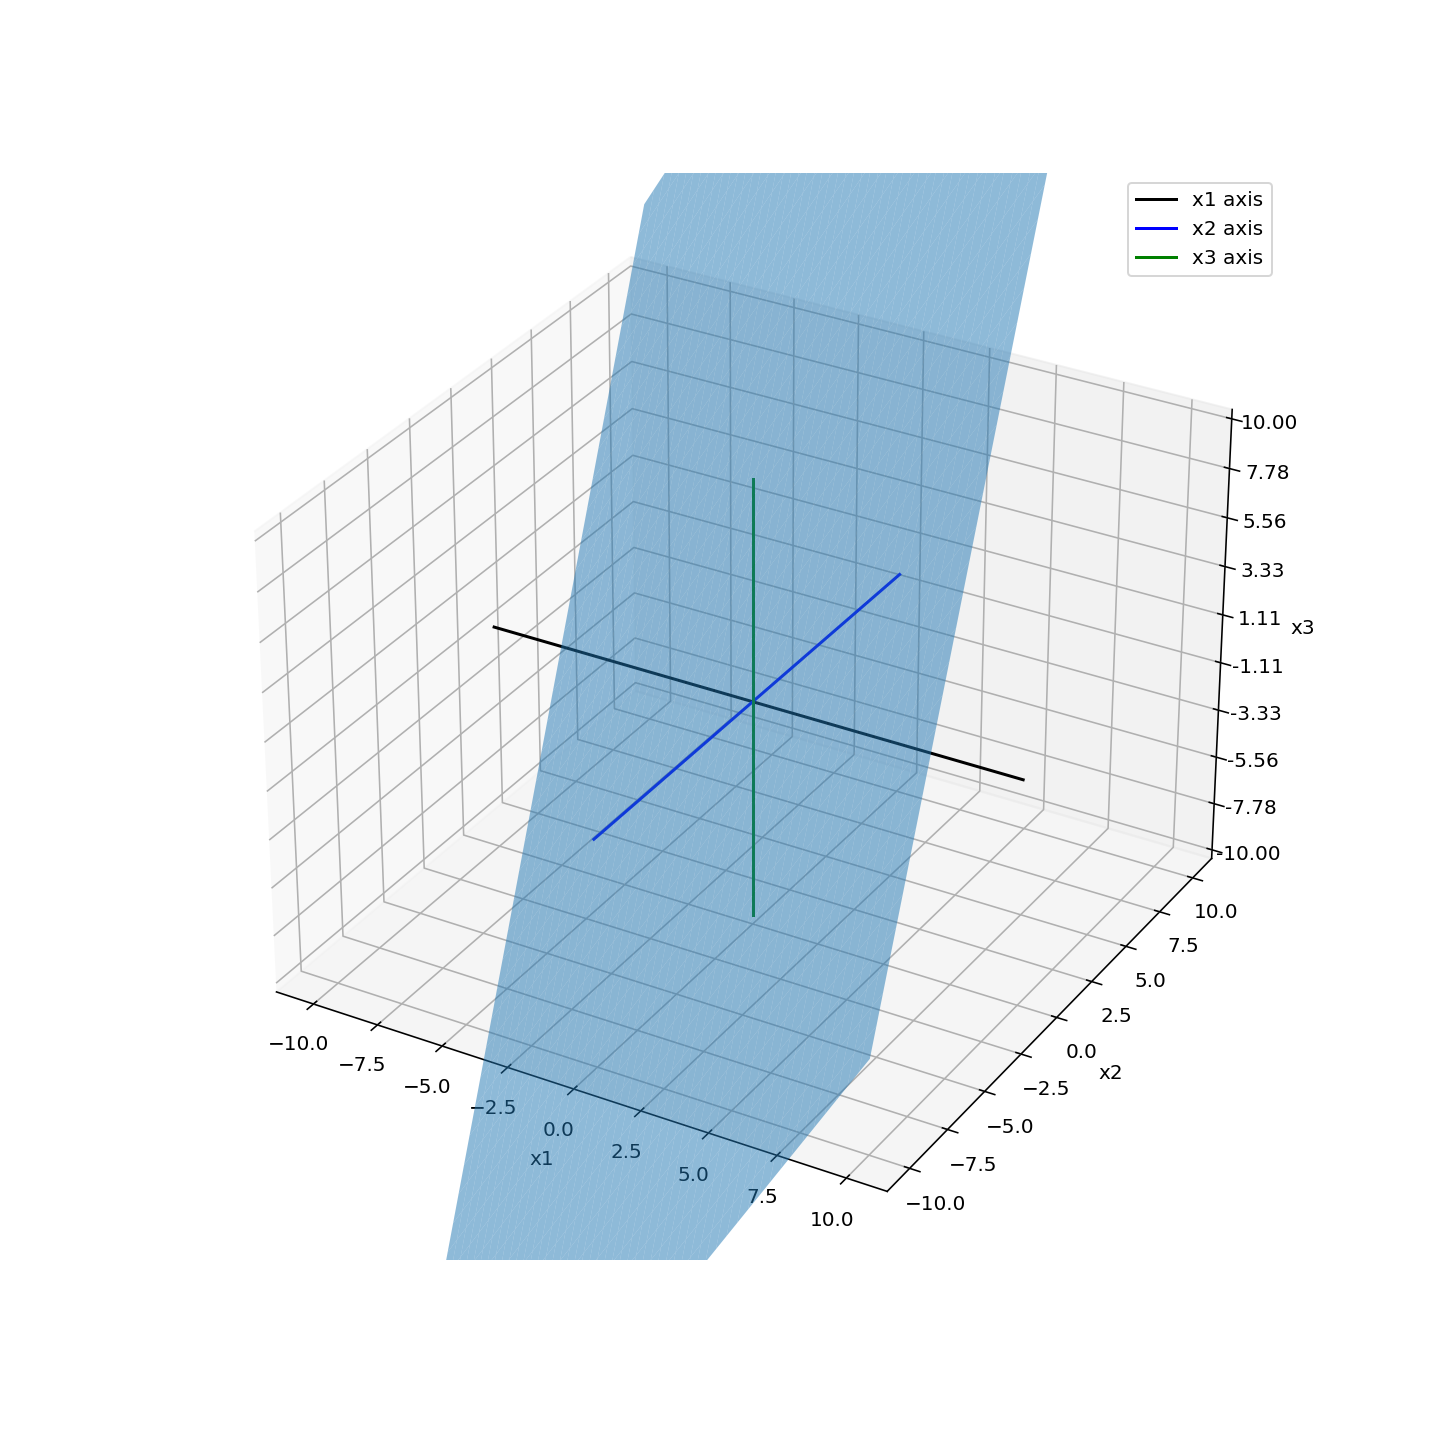

In [110]:
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np

fig, ax = plt.subplots(figsize=(10,10),subplot_kw={"projection": "3d"})

X1, X2 = np.meshgrid(x1, x2)
X3 = plane_func(X1, X2)

surf = ax.plot_surface(X1, X2, X3, alpha=.5)

ax.plot([-10,10],[0,0], [0,0], color='black',label='x1 axis')
ax.plot([0,0],[-10,10], [0,0], color='blue', label='x2 axis')
ax.plot([0,0],[0,0],[-10,10],color='green',label='x3 axis')

ax.set_zlim(-10, 10)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter('{x:.02f}')

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')

plt.legend()


plt.show()

Now our $\ell_{1}$ norm equation has 3 components instead of 2: 

$$ \ell_{2} norm: ||x||_{2} = \sqrt{\sum_{i=1}^{n}|x_{i}|^2}$$

**Side Note:** for a simpler illustration for `np.meshgrid`.

It takes all possible permutations of `x1` and `x2` values and finds `x3` at those points (given by $f(x_{1},x_{2})$).

In [111]:
x1 = np.arange(-10, 10, .01)
x2 = np.arange(-10, 10, .01)
plane_func = lambda x1, x2: (2*x1) + (3*x2) + 4

x3 = []
# Loop through all values in x1 direction
for val1 in x1:
    # Create subarray to return a multi dimensional result
    sub_x3 = []
    # Loop through all values in x2 direction
    for val2 in x2:
        sub_x3.append(plane_func(val1, val2))
    # Append subarray to final array    
    x3.append(np.array(sub_x3)) 
# Convert to numpy
x3 = np.array(x3)

---

Now if we combine all three of these arrays into `x,y,z` coordinate pairs, we can find where the norm is minimized.

---

In [112]:
coords = np.stack((X1, X2, X3)).T

# Calculate L2 Norm of each coordinate pair 
coord_sum = np.sqrt((np.abs(coords[..., 0])**2) + (np.abs(coords[..., 1])**2)+ (np.abs(coords[..., 2])**2))

In [113]:
# Find where norm is minimized
opt_norm = np.min(coord_sum)
np.min(coord_sum)

1.0690650120549319

In [114]:
# Check the components of the minimized norm
min_coords = coords[np.where(coord_sum <= np.min(coord_sum))].flatten()

In [115]:
print(min_coords)

[-0.57 -0.86  0.28]


In [119]:
def satisfies_fn(coordinates, A=[2, 3, -1], b=4):
    '''
    Sanity check to make sure the dot products of our coordinates with our original matrix A is approximately 0.
    
    This may be slightly different from 0 due to floating point operations, so I use a small epsilon value to
    substitute for 0.
    '''
    eps = 1e-10
    assert np.all(np.abs(np.dot(coords, A) + 4) <= eps), "\033[93mFunction not satisfied error\033[0m"
    print("\033[92mCoordinates satisfied!\033[0m")

In [120]:
satisfies_fn(coords)

Coordinates satisfied!


The nearest solution per our coordinates would be:



<IPython.core.display.Javascript object>


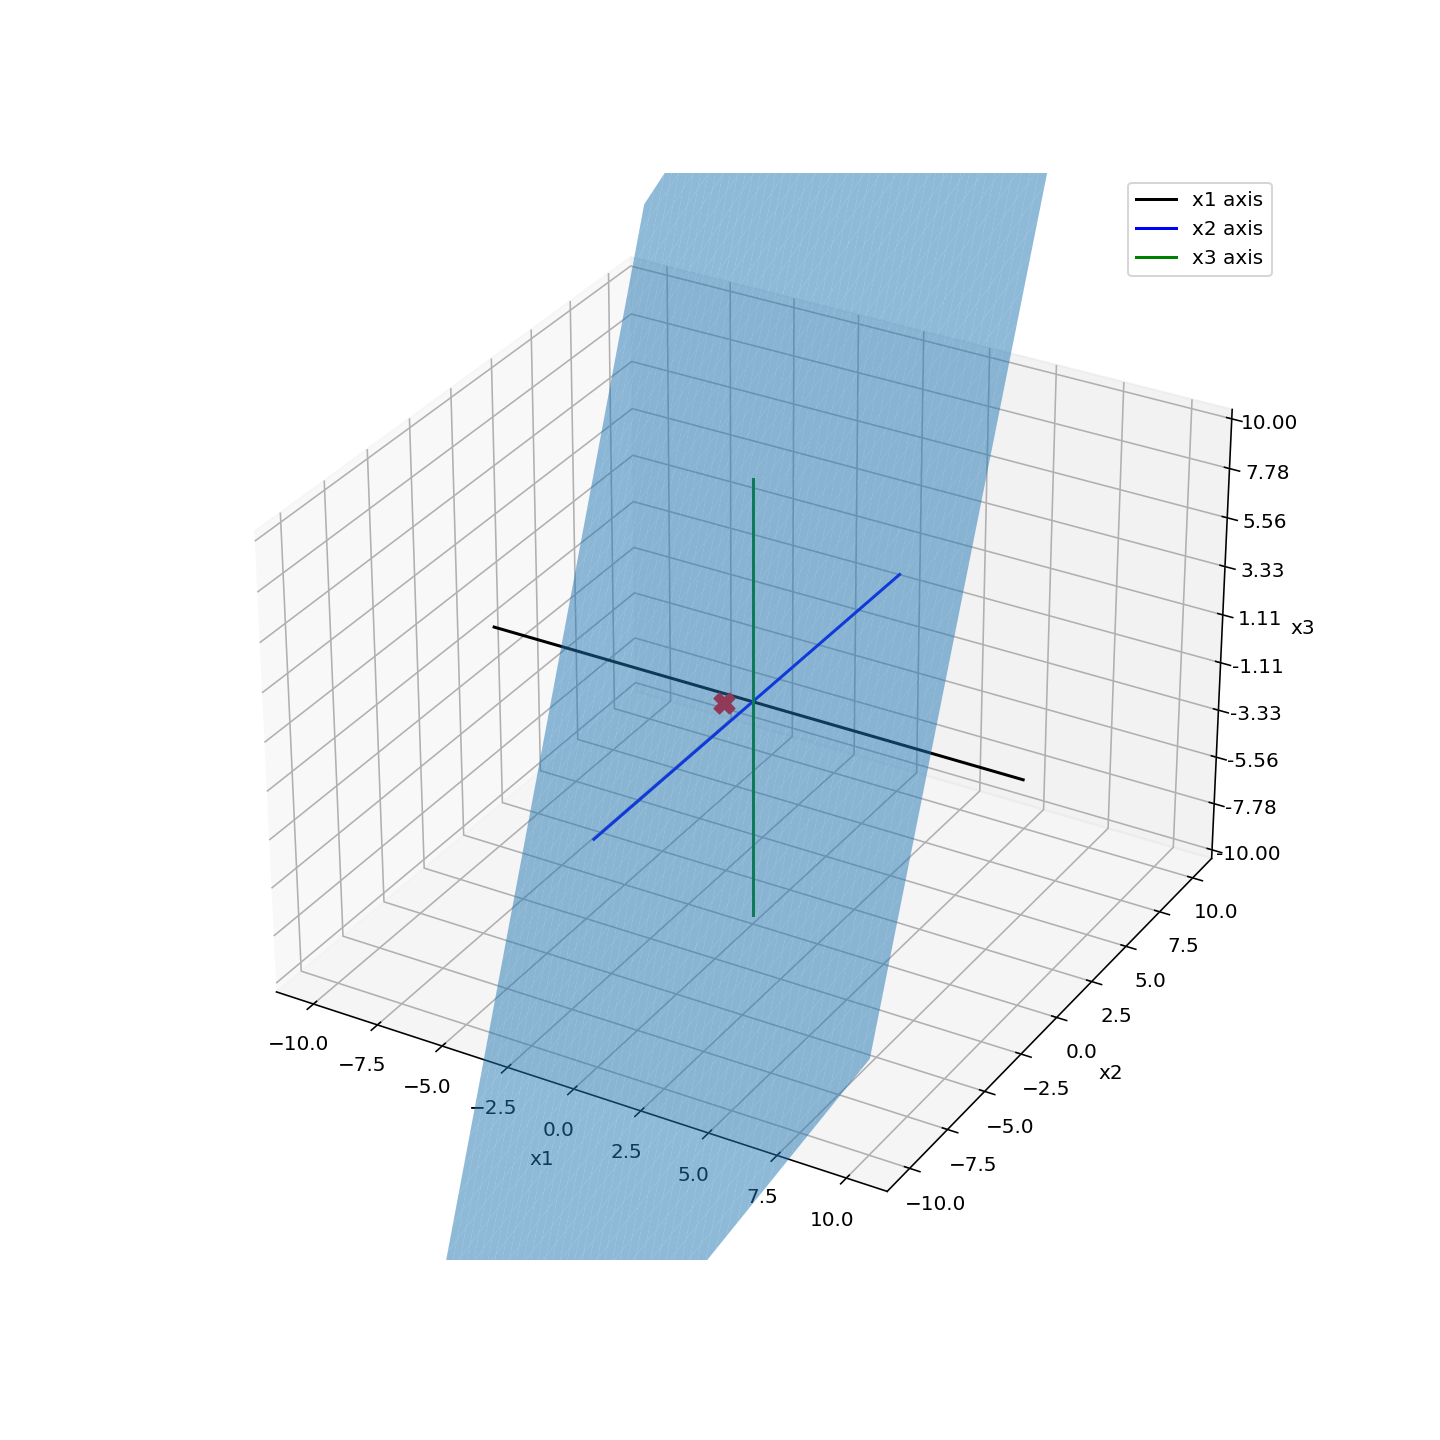

In [121]:
fig, ax = plt.subplots(figsize=(10,10),subplot_kw={"projection": "3d"})

X1, X2 = np.meshgrid(x1, x2)
X3 = plane_func(X1, X2)

surf = ax.plot_surface(X1, X2, X3, alpha=.5)

ax.plot([-10,10],[0,0], [0,0], color='black',label='x1 axis')
ax.plot([0,0],[-10,10], [0,0], color='blue', label='x2 axis')
ax.plot([0,0],[0,0],[-10,10],color='green',label='x3 axis')

ax.set_zlim(-10, 10)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter('{x:.02f}')

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')


xx, yy, zz = min_coords

ax.scatter(xx, yy, zz, c='red', marker='X', s=100)

plt.legend()


plt.show()

---

Now we can look at the entire surface which minimizes the $\ell_{2}$ norm.

In [185]:
x1 = np.arange(-5, 5, .01)
x2 = np.arange(-5, 5, .01)

X1, X2 = np.meshgrid(x1, x2)
X3 = plane_func(X1, X2)

In [186]:
coords = np.stack((X1, X2, X3)).T

In [187]:
coord_sum = np.sqrt((np.abs(coords[..., 0]) ** 2) + (np.abs(coords[..., 1]) ** 2) + (np.abs(coords[..., 2]) ** 2))

First we can calculate the norm by minizing:

$$ \sqrt{|x_{1}|^2 + |x_{2}|^2 + |x_{3}|^2} $$

subject to the equation of our plane:

$$ x_{3} = 2x_{1} + 3x_{2} + 4 $$

whic then becomes:

$$ |x_{1}|^2 + |x_{2}|^2 + |x_{3}|^2 = 1.069^2$$

and: 

$$ |x_{3}| = \sqrt{ (1.069^2 - |x_{1}|^2 - |x_{2}|^2) }$$

$$ x_{3} = \pm\sqrt{ ((1.069^2) - (x_{1})^2 - (x_{2})^2) }$$

In [193]:
pos_norm_func = lambda x1, x2: np.sqrt((opt_norm**2) - (np.abs(x1)**2) - (np.abs(x2)**2))
neg_norm_func = lambda x1, x2: -np.sqrt((opt_norm**2) - (np.abs(x1)**2) - (np.abs(x2)**2))

In [194]:
# Positive Piece
x1n_pos = np.arange(-(opt_norm), (opt_norm), .001)
x2n_pos = np.arange(-(opt_norm), (opt_norm), .001)

x1n_pos, x2n_pos = np.meshgrid(x1n_pos, x2n_pos)

x3n_pos = pos_norm_func(x1n_pos, x2n_pos)

# Negative Piece

x1n_neg = np.arange(-(opt_norm), (opt_norm), .001)
x2n_neg = np.arange(-(opt_norm), (opt_norm), .001)

x1n_neg, x2n_neg = np.meshgrid(x1n_neg, x2n_neg)

x3n_neg = neg_norm_func(x1n_neg, x2n_neg)

/var/folders/nq/ydw8sbmd0492r2npkdsbqqvc0000gn/T/ipykernel_2059/30214252.py:1: RuntimeWarning: invalid value encountered in sqrt
  pos_norm_func = lambda x1, x2: np.sqrt((opt_norm**2) - (np.abs(x1)**2) - (np.abs(x2)**2))
/var/folders/nq/ydw8sbmd0492r2npkdsbqqvc0000gn/T/ipykernel_2059/30214252.py:2: RuntimeWarning: invalid value encountered in sqrt
  neg_norm_func = lambda x1, x2: -np.sqrt((opt_norm**2) - (np.abs(x1)**2) - (np.abs(x2)**2))


In [195]:
np.isnan(x3n_pos).sum() / x3n_pos.flatten().shape[0]

0.21524544398087042

<IPython.core.display.Javascript object>


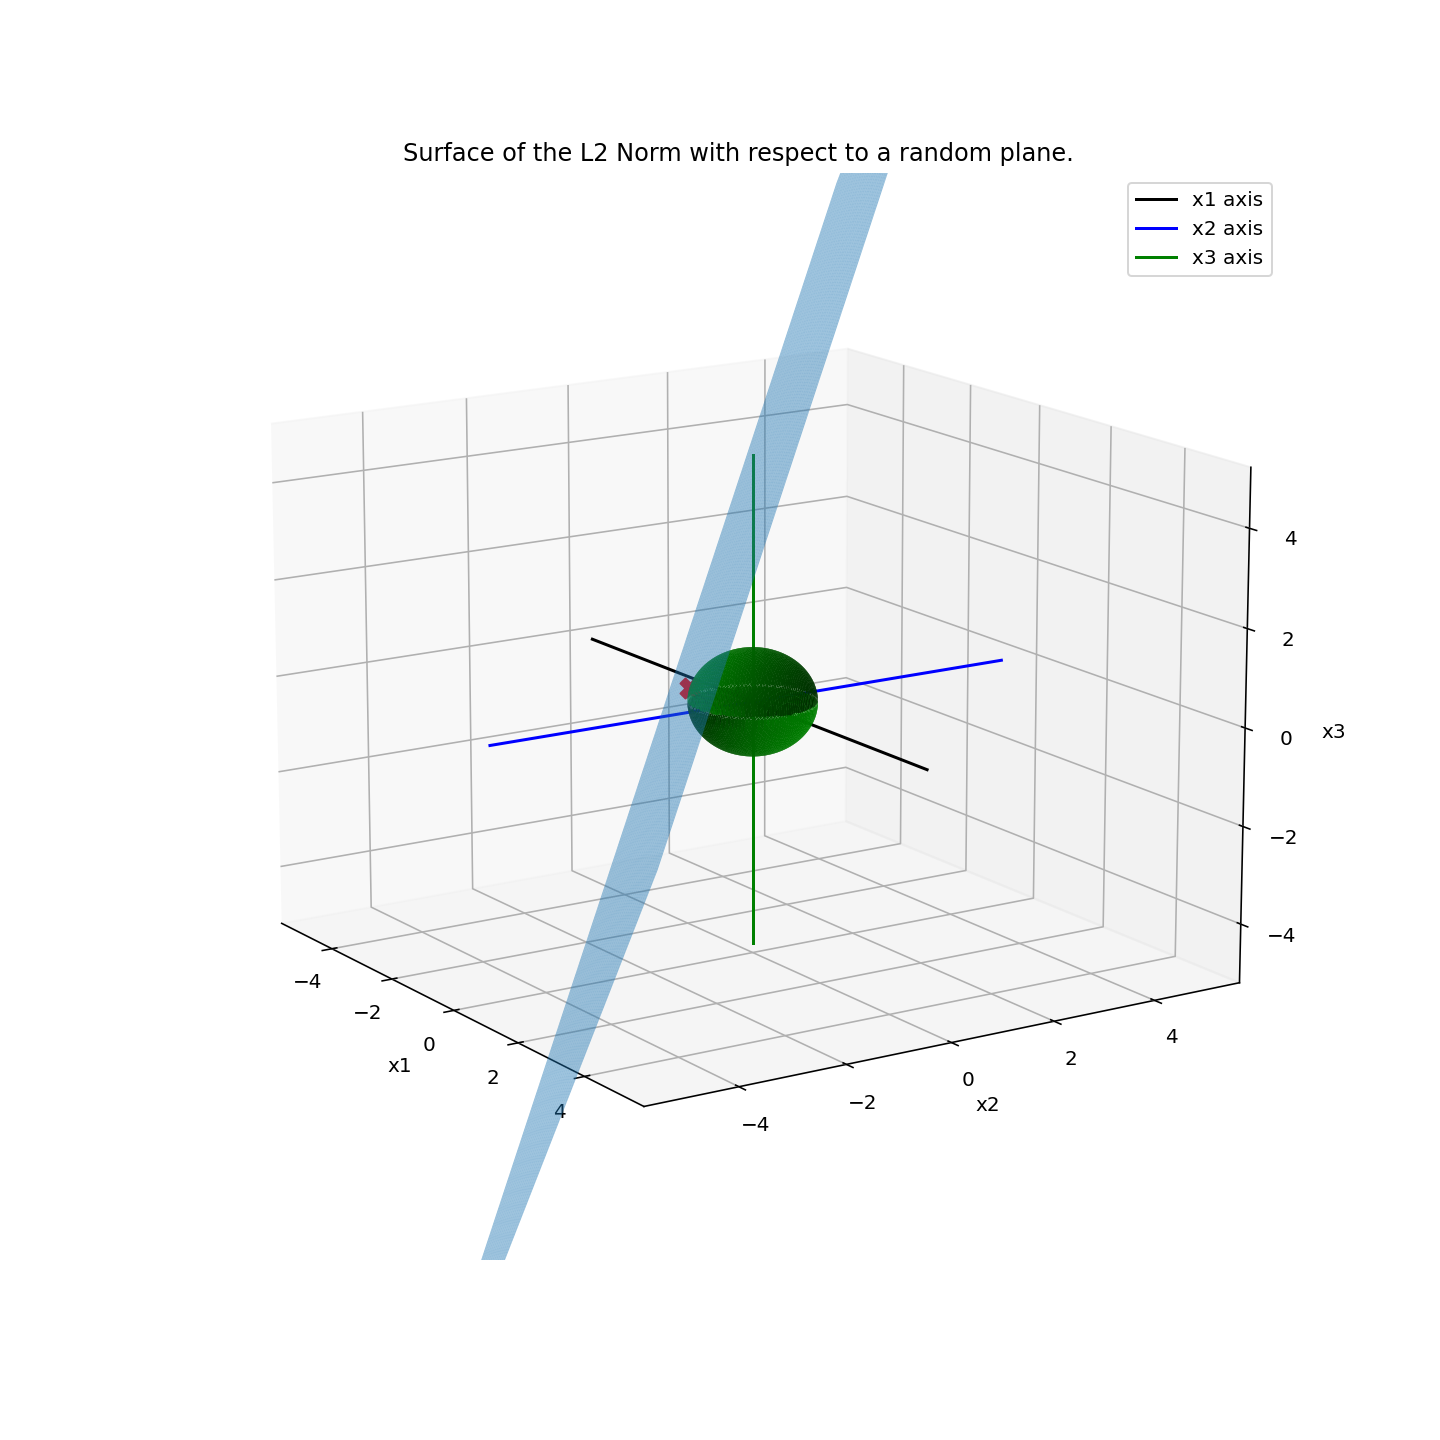

In [196]:
fig, ax = plt.subplots(figsize=(10,10),subplot_kw={"projection": "3d"})

# Make data.
X1, X2 = np.meshgrid(x1, x2)
X3 = plane_func(X1, X2)

# Plot the surface.
surf = ax.plot_surface(X1, X2, X3, alpha=0.5)
pos_norm_surf = ax.plot_surface(x1n_pos, x2n_pos, x3n_pos, alpha=1, color='green')
neg_norm_surf = ax.plot_surface(x1n_neg, x2n_neg, x3n_neg, alpha=1, color='green')

ax.plot([-5,5],[0,0], [0,0], color='black',label='x1 axis')
ax.plot([0,0],[-5,5], [0,0], color='blue', label='x2 axis')
ax.plot([0,0],[0,0],[-5,5],color='green',label='x3 axis')

# Customize the z axis.
ax.set_zlim(-5, 5)

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')
ax.set_title('Surface of the L2 Norm with respect to a random plane.')

xx, yy, zz = min_coords


ax.scatter(xx, yy, zz, c='red', marker='X', s=100)

plt.legend()

plt.show()